In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Wczytaj dane z pliku CSV
dtype = [('sex', 'U10'), ('length', 'f8'), ('diameter', 'f8'), ('height', 'f8'), ('whole_weight', 'f8'), ('shucked_weight', 'f8'),
         ('viscera_weight', 'f8'), ('shell_weight', 'f8'), ('rings', 'i4')]
data = np.genfromtxt("data.csv", delimiter=",", dtype=dtype)
quantitative_variables = ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

# Zlicz wystąpienia 'M' w kolumnie 'sex'
count_m = np.count_nonzero(data['sex'] == 'M')
count_f = np.count_nonzero(data['sex'] == 'F')
count_i = np.count_nonzero(data['sex'] == 'I')
# Zlicz łączną ilość wystąpień
total_count = count_m + count_f + count_i
percent_m = (count_m / total_count) * 100
percent_i = (count_i / total_count) * 100
percent_f = (count_f / total_count) * 100
b = {'count':[count_m, count_i, count_f],'%':[round(percent_m,2),round(percent_i,2),round(percent_f,2)]}
df_b = pd.DataFrame(b)
df_b.index = ['Male','Infant','Female']
df_b



,count,%
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


In [12]:
summary_stats = []

# Iteruj się przez zmienne ilościowe i oblicz statystyki
for variable in quantitative_variables:
    stats = [
        round(np.mean(data[variable]), 4),
        round(np.std(data[variable]), 4),
        round(np.min(data[variable]), 4),
        round(np.percentile(data[variable], 25), 4),
        round(np.percentile(data[variable], 50), 4),
        round(np.percentile(data[variable], 75), 4),
        round(np.max(data[variable]), 4)
    ]
    
    summary_stats.append(stats)

# Stwórz DataFrame z podsumowaniem statystyk
df_summary = pd.DataFrame(summary_stats, columns=[
                                                  'mean', 'std', 'min',
                                                  '25%', '50%', '75%', 'max'])
df_summary.index = ['Lenght','Diameter','Height','Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

# Wyświetl podsumowanie
df_summary

,mean,std,min,25%,50%,75%,max
Lenght,0.5240,0.1201,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,0.4079,0.0992,0.0550,0.3500,0.4250,0.480,0.6500
Height,0.1395,0.0418,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,0.8287,0.4903,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,0.3594,0.2219,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,0.1806,0.1096,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,0.2388,0.1392,0.0015,0.1300,0.2340,0.329,1.0050
Rings,9.9337,3.2238,1.0000,8.0000,9.0000,11.000,29.0000


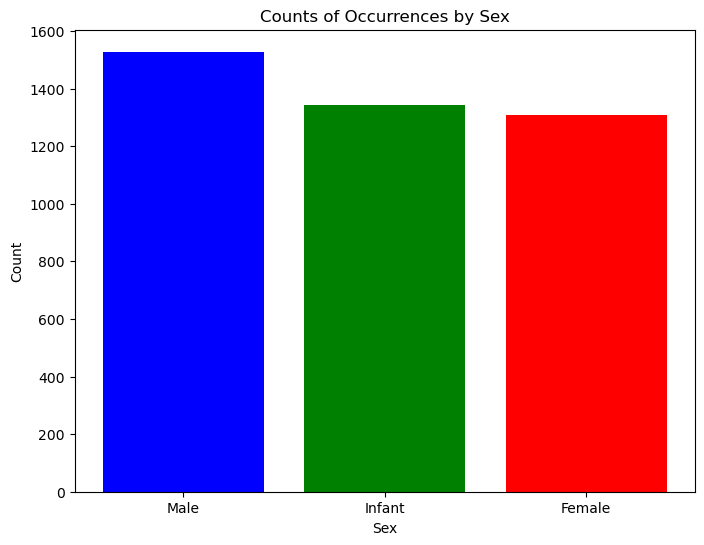

In [13]:
import matplotlib.pyplot as plt

counts = df_b['count']
categories = df_b.index

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'green', 'red'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Counts of Occurrences by Sex')
plt.show();


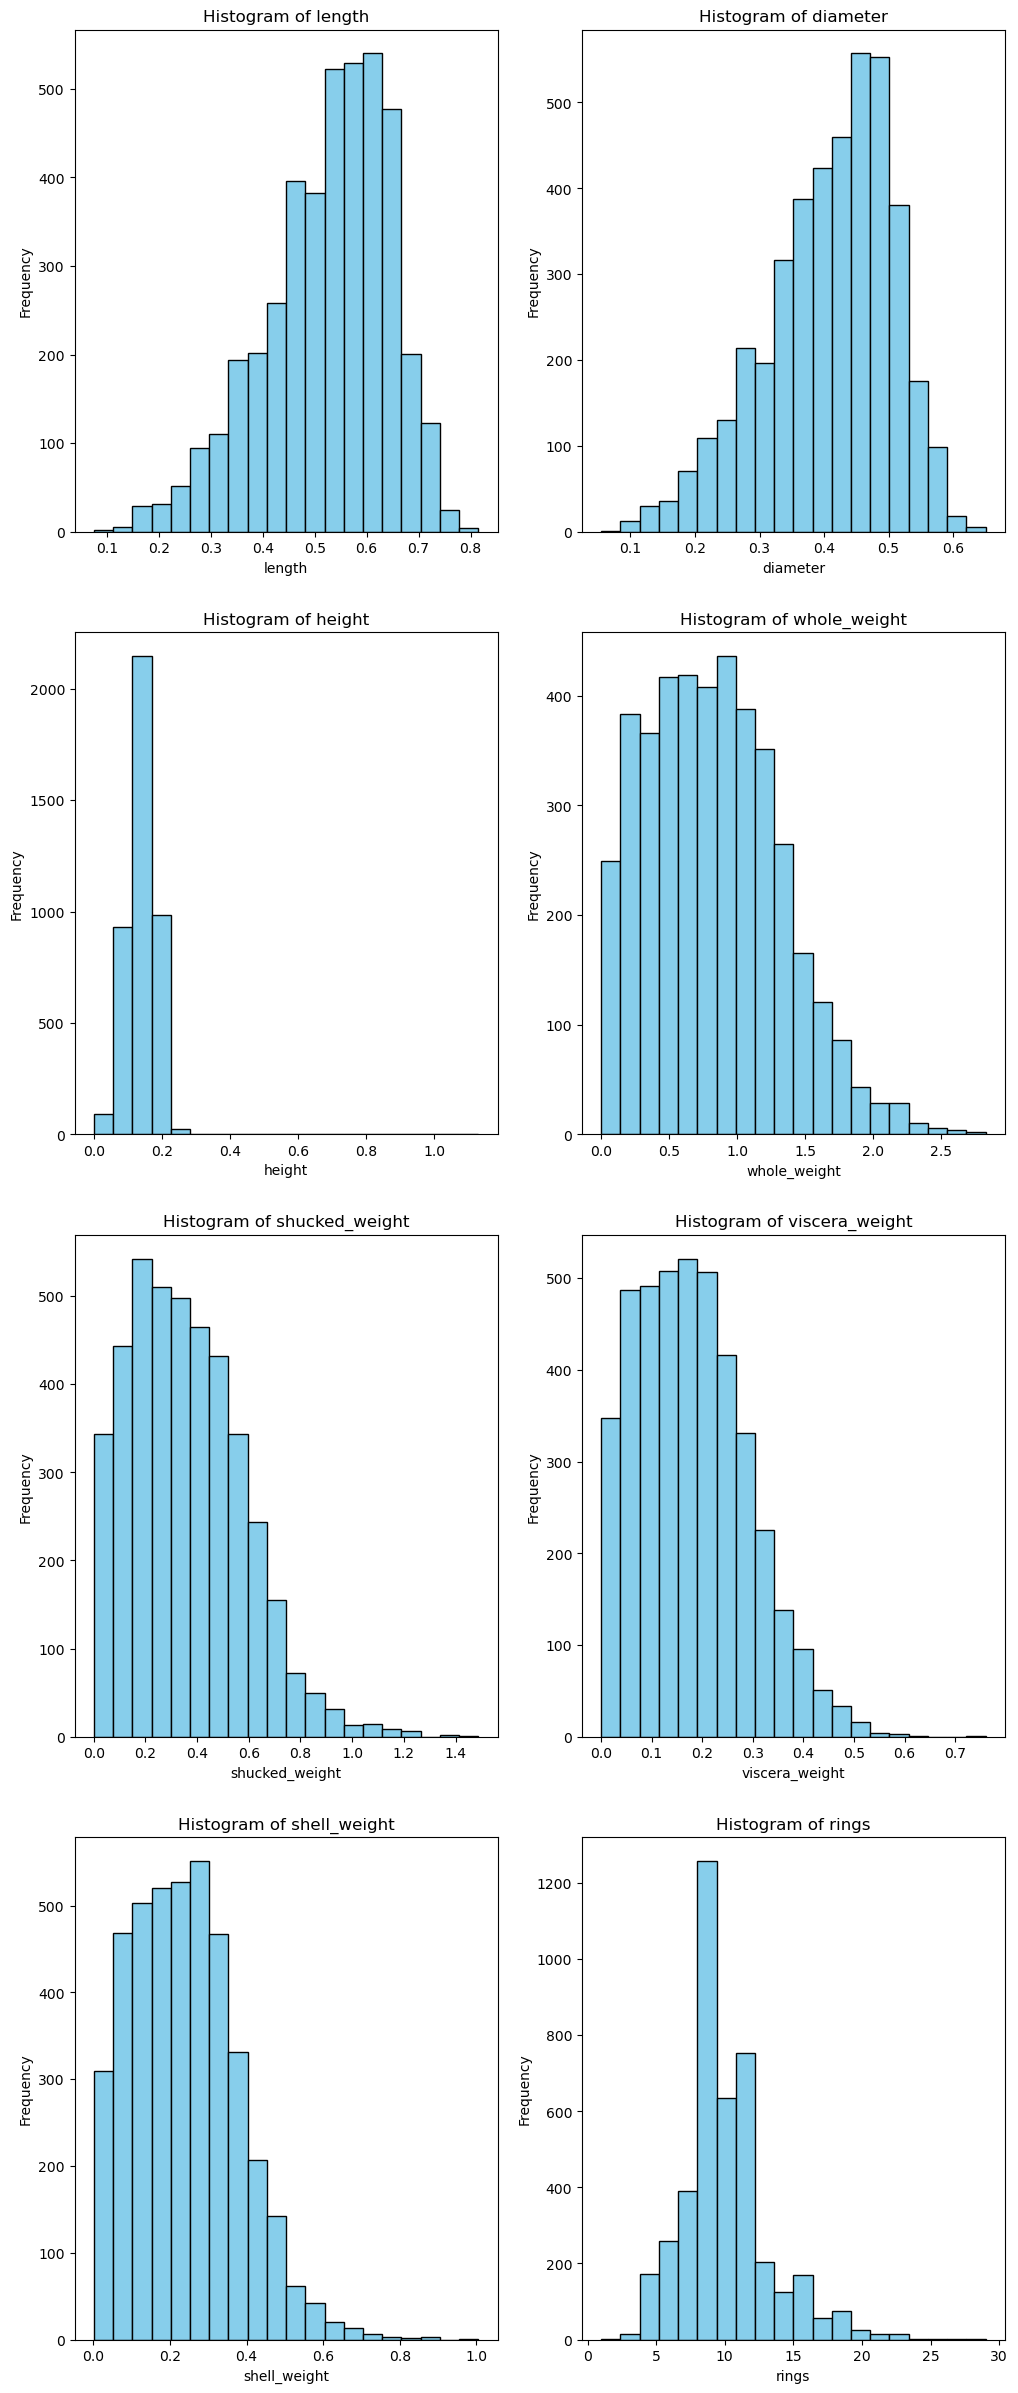

In [14]:
quantitative_variables = ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

# Tworzenie subplotów (4 wiersze, 2 kolumny) z odstępem
fig, axes = plt.subplots(4, 2, figsize=(12, 30))

# Dodaj odstęp pionowy

# Iteruj się przez zmienne ilościowe i twórz histogramy
for i, variable in enumerate(quantitative_variables):
    row = i // 2
    col = i % 2
    axes[row, col].hist(data[variable], bins=20, color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'Histogram of {variable}')
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel('Frequency')

# Wyświetl wykres
plt.show()


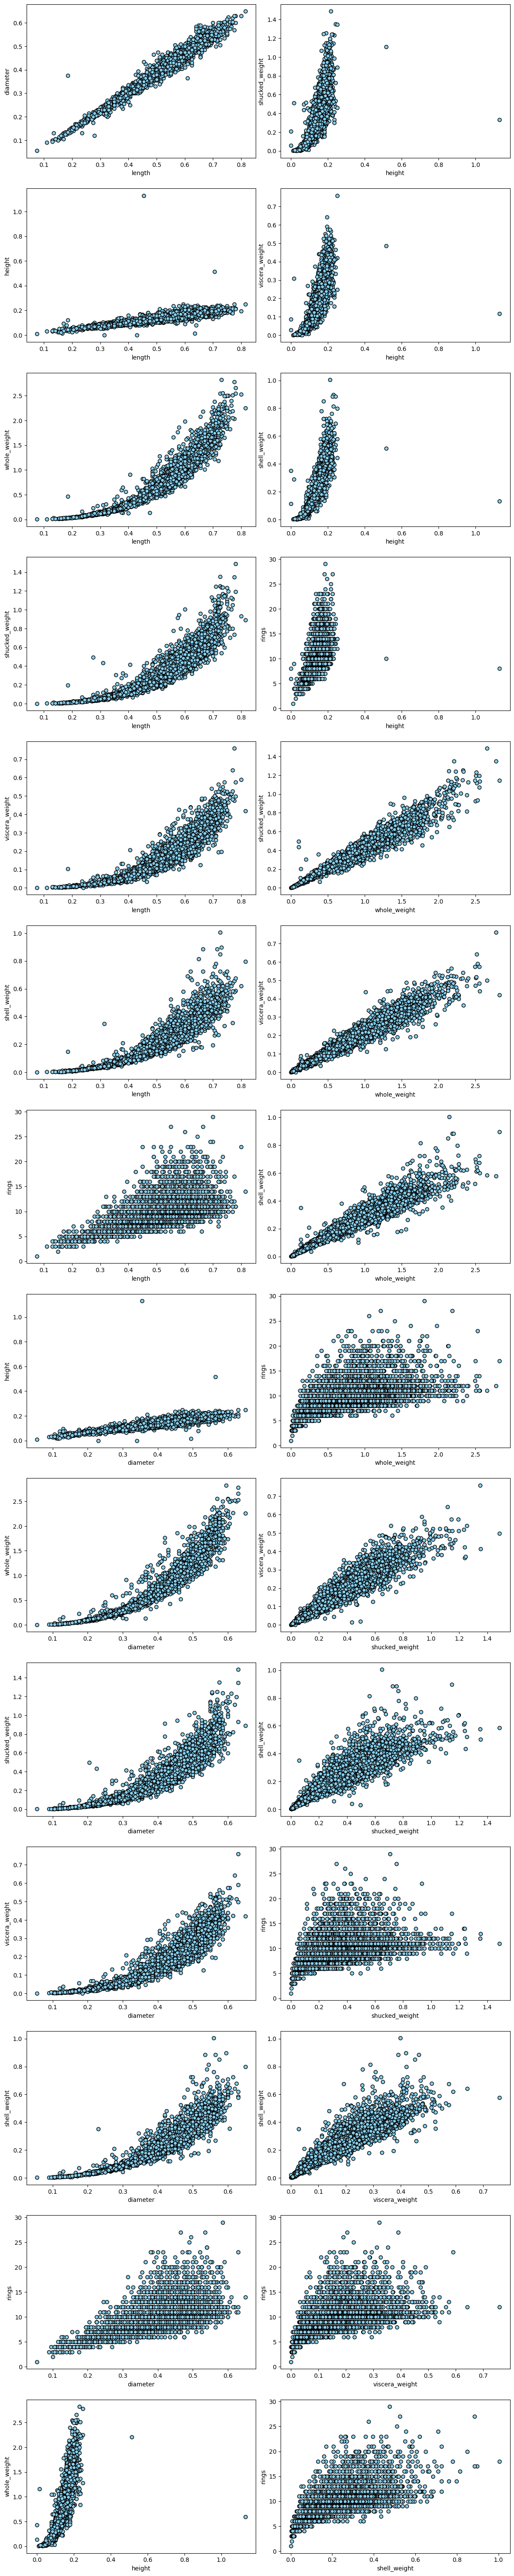

In [15]:
# Wybierz zmienne ilościowe
quantitative_variables = ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

# Tworzenie subplotów (14 wierszy, 2 kolumny)
fig, axes = plt.subplots(14, 2, figsize=(12, 60))
fig.tight_layout()

# Dodaj odstęp pionowy
plt.subplots_adjust(hspace=0.2)

# Wykresy dla pierwszej zmiennej (length) z pozostałymi 7 zmiennymi
for j in range(1, len(quantitative_variables)):
    row = j - 1
    col = 0
    x_variable = 'length'
    y_variable = quantitative_variables[j]
    axes[row, col].scatter(data[x_variable], data[y_variable], c='skyblue', edgecolor='black')
    axes[row, col].set_xlabel(x_variable)
    axes[row, col].set_ylabel(y_variable)
    
# Wykresy dla drugiej zmiennej (diameter) z pozostałymi 7 zmiennymi
for j in range(2, len(quantitative_variables)):
    row = j + 5
    col = 0
    x_variable = 'diameter'
    y_variable = quantitative_variables[j]
    axes[row, col].scatter(data[x_variable], data[y_variable], c='skyblue', edgecolor='black')
    axes[row, col].set_xlabel(x_variable)
    axes[row, col].set_ylabel(y_variable)

row = 13
col = 0
x_variable = 'height'
y_variable = 'whole_weight'
axes[row, col].scatter(data[x_variable], data[y_variable], c='skyblue', edgecolor='black')
axes[row, col].set_xlabel(x_variable)
axes[row, col].set_ylabel(y_variable)

for j in range(4, len(quantitative_variables)):
    row = j - 4
    col = 1
    x_variable = 'height'
    y_variable = quantitative_variables[j]
    axes[row, col].scatter(data[x_variable], data[y_variable], c='skyblue', edgecolor='black')
    axes[row, col].set_xlabel(x_variable)
    axes[row, col].set_ylabel(y_variable)
    
for j in range(4, len(quantitative_variables)):
    row = j 
    col = 1
    x_variable = 'whole_weight'
    y_variable = quantitative_variables[j]
    axes[row, col].scatter(data[x_variable], data[y_variable], c='skyblue', edgecolor='black')
    axes[row, col].set_xlabel(x_variable)
    axes[row, col].set_ylabel(y_variable)
    
for j in range(5, len(quantitative_variables)):
    row = j +3
    col = 1
    x_variable = 'shucked_weight'
    y_variable = quantitative_variables[j]
    axes[row, col].scatter(data[x_variable], data[y_variable], c='skyblue', edgecolor='black')
    axes[row, col].set_xlabel(x_variable)
    axes[row, col].set_ylabel(y_variable)

for j in range(6, len(quantitative_variables)):
    row = j +5
    col = 1
    x_variable = 'viscera_weight'
    y_variable = quantitative_variables[j]
    axes[row, col].scatter(data[x_variable], data[y_variable], c='skyblue', edgecolor='black')
    axes[row, col].set_xlabel(x_variable)
    axes[row, col].set_ylabel(y_variable)
    
row = 13
col = 1
x_variable = 'shell_weight'
y_variable = 'rings'
axes[row, col].scatter(data[x_variable], data[y_variable], c='skyblue', edgecolor='black')
axes[row, col].set_xlabel(x_variable)
axes[row, col].set_ylabel(y_variable)

# Wyświetl wykres
plt.show()

In [16]:
df = pd.DataFrame(data)

# Stwórz macierz korelacji liniowej
correlation_matrix = df[quantitative_variables].corr()

# Wyświetl macierz korelacji
correlation_matrix

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


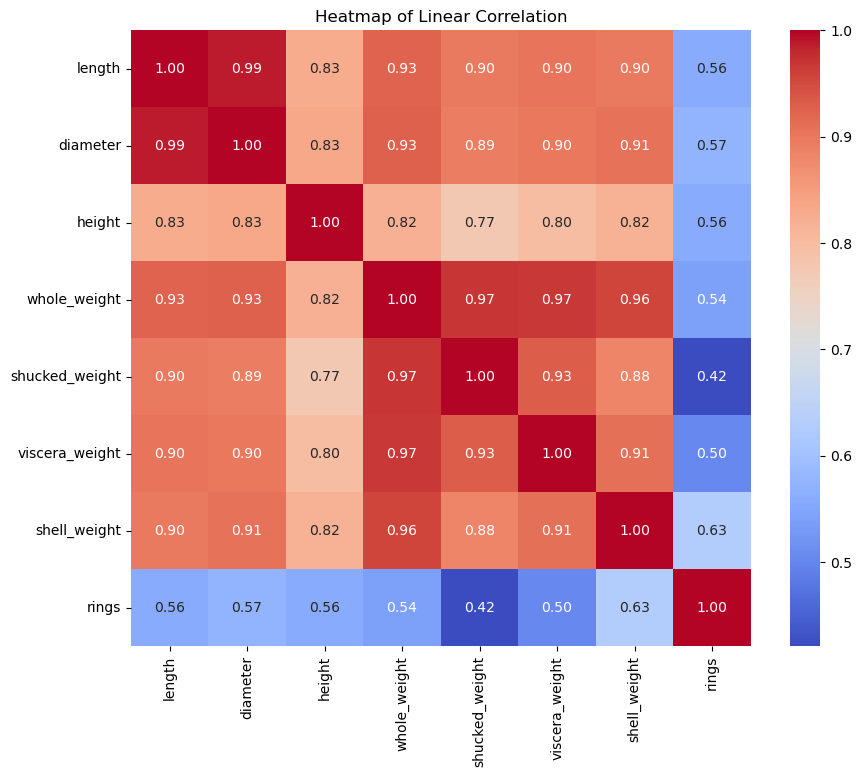

In [17]:
# Stwórz DataFrame z wczytanych danych
df = pd.DataFrame(data)

# Wybierz zmienne ilościowe (bez kolumny "sex")
quantitative_variables = ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

# Stwórz macierz korelacji liniowej
correlation_matrix = df[quantitative_variables].corr()

# Stwórz wykres cieplny
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Linear Correlation')
plt.show()

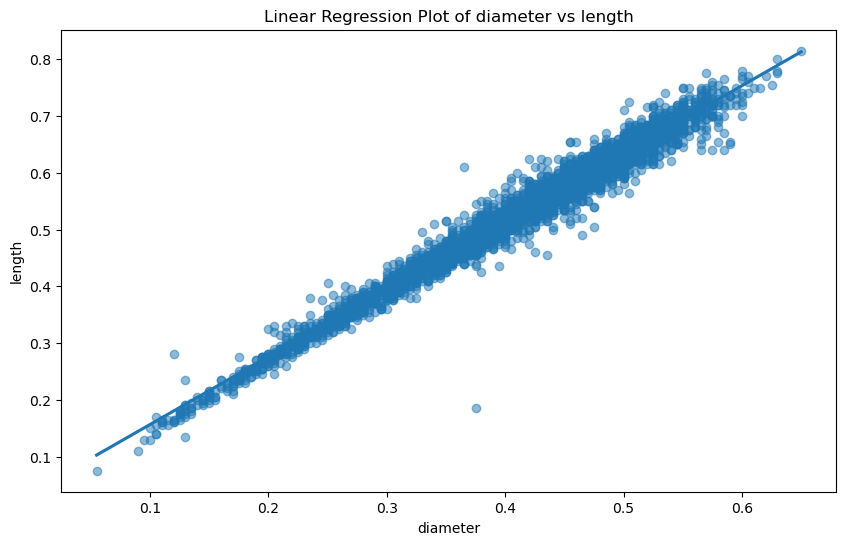

In [18]:
strongest_correlation = correlation_matrix.abs().unstack().sort_values(ascending=False)
strongest_correlation = strongest_correlation[strongest_correlation != 1].idxmax()

# Ustal zmienne na podstawie wyników powyższego kroku
x_variable = strongest_correlation[0]
y_variable = strongest_correlation[1]

# Stwórz wykres regresji liniowej
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x=x_variable, y=y_variable, scatter_kws={'alpha':0.5})
plt.title(f'Linear Regression Plot of {x_variable} vs {y_variable}')
plt.show()

In [25]:
summary_stats = []
# Grupuj dane według kategorii zmiennej jakościowej (tutaj: 'sex')
# Stwórz DataFrame z wczytanych danych
df = pd.DataFrame(data)
quantitative_variables = ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
qualitative_variable = 'sex'
grouped = df.groupby(qualitative_variable)
# Inicjalizuj słownik do mapowania kategorii
category_mapping = {'F': 'Female', 'I': 'Infant', 'M': 'Male'}


# Iteruj się przez zmienne ilościowe
for variable in quantitative_variables:
    for category, group in grouped:
        # Mapuj kategorie
        category_name = category_mapping.get(category, category)
        
        # Oblicz statystyki dla każdej kombinacji zmiennej jakościowej i ilościowej
        mean = group[variable].mean()
        std = group[variable].std()
        min_val = group[variable].min()
        q1 = group[variable].quantile(0.25)
        median = group[variable].median()
        q3 = group[variable].quantile(0.75)
        max_val = group[variable].max()

        # Dodaj wyniki do listy
        summary_stats.append([ category_name, mean, std, min_val, q1, median, q3, max_val])

# Stwórz DataFrame z podsumowaniem statystyk
summary_df = pd.DataFrame(summary_stats, columns=[ 'Sex',
                                                   'mean', 'std', 'min', '25%',
                                                   '50%', '75%', 'max'])
summary_df.index = ['','Length','','', 'Diameter', '', '', 'Height','', '', 'Whole weight','','','Shucked weight','',
                    '','Viscera weight','','','Shell weight','','','Rings','']
# Dodaj podpis do kolumny
summary_df.columns.name = 'Feature'
# Wyświetl podsumowanie
summary_df

Feature,Sex,mean,std,min,25%,50%,75%,max
,Female,0.579093,0.086160,0.2750,0.525000,0.59000,0.640000,0.8150
Length,Infant,0.427746,0.108858,0.0750,0.360000,0.43500,0.510000,0.7250
,Male,0.561391,0.102697,0.1550,0.505000,0.58000,0.630000,0.7800
,Female,0.454732,0.070954,0.1950,0.410000,0.46500,0.505000,0.6500
Diameter,Infant,0.326494,0.088109,0.0550,0.270000,0.33500,0.390000,0.5500
,Male,0.439287,0.084398,0.1100,0.395000,0.45500,0.500000,0.6300
,Female,0.158011,0.039984,0.0150,0.140000,0.16000,0.175000,1.1300
Height,Infant,0.107996,0.031995,0.0000,0.085000,0.11000,0.130000,0.2200
,Male,0.151381,0.034804,0.0250,0.130000,0.15500,0.175000,0.5150
,Female,1.046532,0.430316,0.0800,0.730000,1.03850,1.320250,2.6570


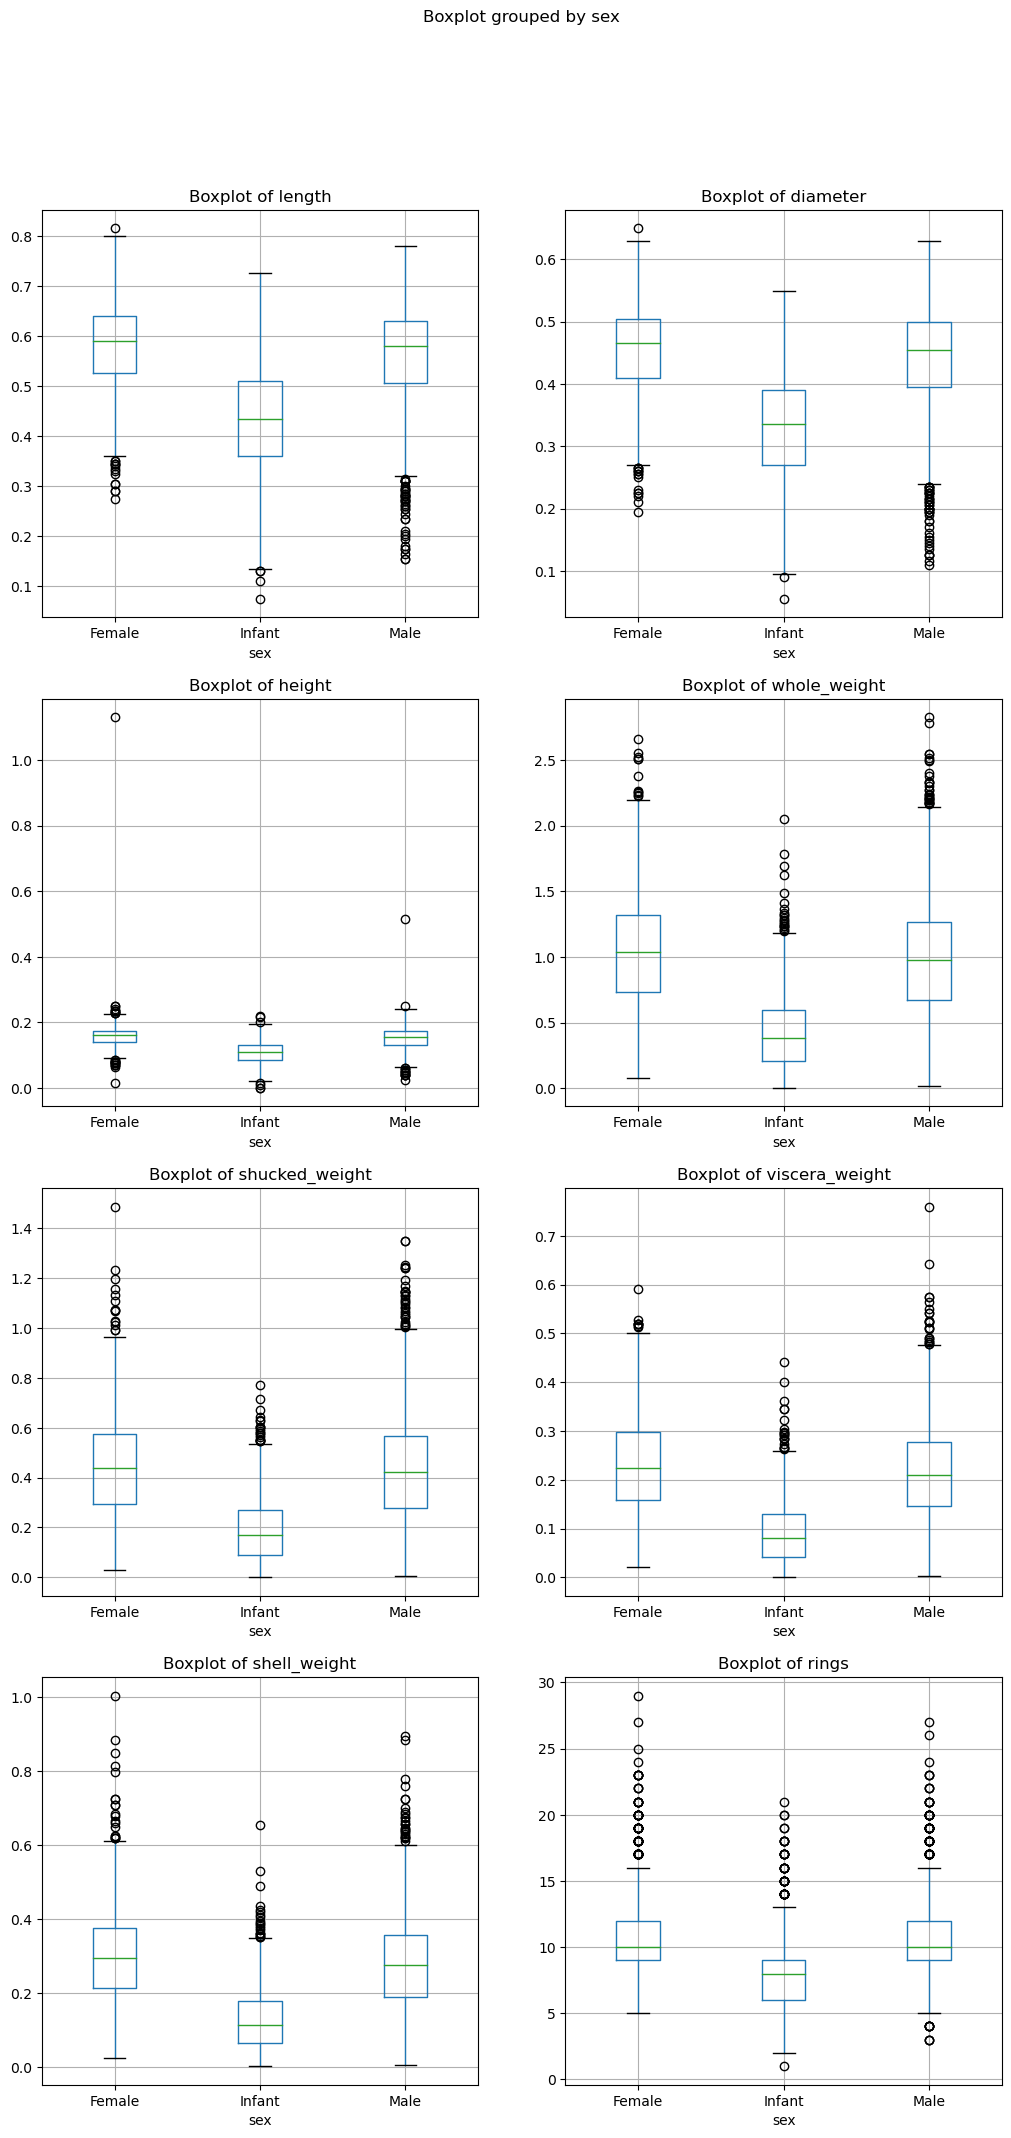

In [51]:
dfa = pd.DataFrame(data)
dfa[qualitative_variable] = dfa[qualitative_variable].map(category_mapping)
# Tworzenie subplotów (4 wiersze, 2 kolumny)
fig, axes = plt.subplots(4, 2, figsize=(12, 25))
fig.tight_layout()
fig.subplots_adjust(hspace=0.2)  # Dodaj odstęp między subplotami
# Iteruj się przez zmienne ilościowe i twórz boxploty
for i, variable in enumerate(quantitative_variables):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Tworzenie boxplota
    dfa.boxplot(column=variable, by=qualitative_variable, ax=ax)
    
    # Ustaw tytuł i oznaczenia osi
    ax.set_title(f'Boxplot of {variable}')


# Wyświetl wykres
plt.show()